In [1]:
# the data used for this study was collected from Udemy data science exercise..
# Henry Nwachukwu Project 1 Date submitted: 20:03:2020. ERP COLLEGE Calgary.
# Project Summary: TO group countries based on their Longitude and Latitude

In [2]:
pwd

'C:\\Users\\Henry\\Desktop\\my Portfolio\\Cluster_prediction'

In [3]:
# Import Relevant libraries for the studies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
country_data=pd.read_csv('country.csv')

In [5]:
country_data.head(5)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [6]:
country_data.head(5)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [7]:
# The Approach that will be utilize in this study is KMeans
# KMeans is sensitive to outliers, Standardize data and missing value 
# and.. So effort will be made during EDA to ensure the data is good for analysis.

In [8]:
# checking for missing Values
country_data.isnull().sum()

name         0
Longitude    0
Latitude     0
dtype: int64

In [9]:
# checking for outliers
country_data.describe(include = 'all')

,name,Longitude,Latitude
count,241,241.000000,241.000000
unique,241,NaN,NaN
top,Barbados,NaN,NaN
freq,1,NaN,NaN
mean,NaN,14.215380,17.169377
std,NaN,72.013654,26.554014
min,NaN,-177.348348,-80.508579
25%,NaN,-36.433184,1.358761
50%,NaN,18.644925,17.277500
75%,NaN,47.587005,39.115541


In [10]:
# Defining boundries for removing Outliers using the IQR ( Inter-quartile-Range)Approach.

In [11]:
# Longitude 
Q3=47.58 
Q1=-36.43
IQR=Q3-Q1
lower_fence= Q1-(1.5*IQR)
Upper_fence=Q3+(1.5*IQR)

In [12]:
lower_fence

-162.445

In [13]:
Upper_fence

173.59499999999997

In [14]:
countries_above = country_data[ (country_data.Longitude > 173)]

In [15]:
countries_above

,name,Longitude,Latitude


In [16]:
countries_below = country_data[ (country_data.Longitude < -162.445)]

In [17]:
countries_below

,name,Longitude,Latitude
10,American Samoa,-170.718026,-14.304460
160,Niue,-169.869947,-19.049457
217,Tonga,-174.809873,-20.428432
235,Wallis and Futuna Is.,-177.348348,-13.887370
236,Samoa,-172.164851,-13.753243


In [18]:
# the above countries fall off the acceptable range and will for sure have different clusters ( using the Longitude values)
# But for the sake of this study all will be Clusters.

In [19]:
# To view the box plot
Longitute_array = country_data["Longitude"].to_numpy()

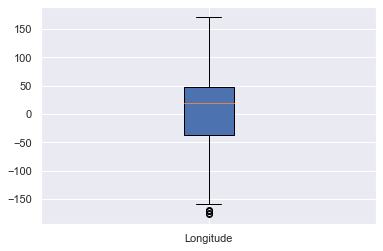

In [20]:
# Creating Plot
plt.boxplot(Longitute_array,patch_artist=True,labels=['Longitude'])
#Show plot
plt.show()

In [21]:
# Comparing box boxp plot for Longitude and Latitude
array =  country_data[["Longitude","Latitude"]].to_numpy()

In [22]:
array

array([[ -69.98267711,   12.52088038],
       [  66.00473366,   33.83523073],
       [  17.53736768,  -12.29336054],
       [ -63.06498927,   18.2239595 ],
       [  20.04983396,   41.14244989],
       [  19.95328768,   60.21488688],
       [   1.56054378,   42.54229102],
       [  54.3001671 ,   23.90528188],
       [ -65.17980692,  -35.3813488 ],
       [  44.92993276,   40.28952569],
       [-170.7180258 ,  -14.30445997],
       [  19.92108951,  -80.50857913],
       [ 123.5838379 ,  -12.42993164],
       [  69.22666758,  -49.24895485],
       [ -61.79469343,   17.2774996 ],
       [ 134.4910001 ,  -25.73288704],
       [  14.1264761 ,   47.58549439],
       [  47.54599879,   40.28827235],
       [  29.87512156,   -3.35939666],
       [   4.64065114,   50.63981576],
       [   2.32785254,    9.6417597 ],
       [  -1.75456601,   12.26953846],
       [  90.23812743,   23.86731158],
       [  25.21552909,   42.76890318],
       [  50.54196932,   26.04205135],
       [ -98.30777028,   

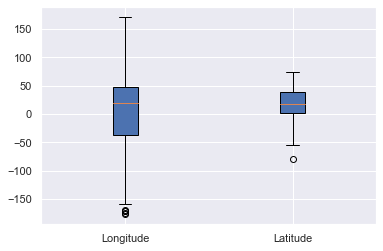

In [23]:
#Comparing both Longitude and Latitude box plot for outliers
# Creating Plot
plt.boxplot(array,patch_artist=True,labels=['Longitude','Latitude'])
#Show plot
plt.show()


In [24]:
X_unscaled = country_data.copy()

In [25]:
X_unscaled

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [26]:
X_unscaled_study = X_unscaled.iloc[:,1:3]

In [27]:
# Now am going to scale X_unscaled_study using MinMaxScaler

In [28]:
country_scaler = MinMaxScaler()
country_scaler.fit(X_unscaled_study)

MinMaxScaler()

In [29]:
# this approach shows the data in array
X_scaled_study = country_scaler.fit_transform(X_unscaled_study)

In [30]:
# I will be using the X_scaled_study_aba for further studies
X_scaled_study_aba = pd.DataFrame(data=country_scaler.transform(X_unscaled_study ),columns=['Longitude','Latitude']) 

In [31]:
X_scaled_study_aba 

,Longitude,Latitude
0,0.307785,0.599343
1,0.697620,0.736661
2,0.558679,0.439477
3,0.327616,0.636085
4,0.565881,0.783738
...,...,...
236,0.014860,0.430072
237,0.644821,0.621173
238,0.580312,0.331842
239,0.588026,0.431972


In [32]:
# I assume a cluster size of 4 at this early stage, after it will be updated with the WCSS
# Clustering
kmeans_4 = KMeans(4)

In [33]:
kmeans_4.fit(X_scaled_study_aba)

KMeans(n_clusters=4)

In [34]:
# Clustering Result
identified_clusters = kmeans_4.fit_predict(X_scaled_study_aba)
identified_clusters

array([3, 2, 0, 3, 2, 2, 2, 2, 3, 2, 3, 0, 1, 0, 3, 1, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 0, 0, 2, 3, 1, 0, 0,
       0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 2, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3, 2, 3,
       1, 3, 1, 0, 3, 2, 3, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 2, 0, 2, 1, 3, 3, 1, 2, 2, 1, 2, 0, 2, 3, 2, 1, 0, 2, 2, 2,
       1, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 3, 0, 0, 1,
       0, 1, 0, 1, 0, 3, 3, 2, 2, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 2, 3,
       1, 2, 3, 2, 3, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 3, 2, 0,
       0, 2, 2, 0, 3, 2, 2, 2, 0, 3, 0, 2, 3, 0, 0, 1, 2, 2, 1, 3, 3, 2,
       2, 1, 0, 0, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 0, 0])

In [35]:
# Adding the cluster column to the data set and visualising it
data_with_clusters = country_data.copy()
data_with_clusters['Clustering_4'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Clustering_4
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


In [36]:
data_with_clusters.tail()

,name,Longitude,Latitude,Clustering_4
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0
240,Zimbabwe,29.851441,-19.004204,0


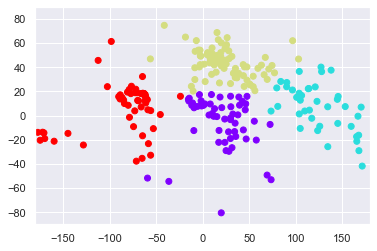

In [37]:
# 2 Key ways of viewing Clusters Analysis plots: Scatter plot & Heat map (Dendogram)
# Scatter plot uses the unscaled axis vs the clusters generated from the scaled parameters.

#Scatter Plot grouping names with the intial assume cluster size of 4.( will be updated after optimal size has being estimayted)
plt.scatter(country_data['Longitude'], country_data['Latitude'],c=data_with_clusters['Clustering_4'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

# Not satisfied with this cluster so, How do i find the optimal number of clusters?

In [38]:
# How do i find the optimal number of clusters?
# Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 20
# Determing the optimal number of clusters using the Elbow Method
# optimal number is the minimal WCSS from plot of within_cluster sum of squares vs number of clusters.

In [39]:
# get the wscc for the current solution
kmeans_4.inertia_
wscc = []
for i in range(1,21):
    kmeans_4 = KMeans(i)
    kmeans_4.fit(X_scaled_study_aba)
    wscc_iter = kmeans_4.inertia_
    wscc.append(wscc_iter)
    

In [40]:
wscc

[17.25228788950315,
 10.629794970269785,
 6.473802754946476,
 4.669606153924581,
 3.6903150228528214,
 3.069202163982738,
 2.446774350793592,
 2.066093353917633,
 1.75399904707574,
 1.5430349333793123,
 1.4252704234615292,
 1.263020558471238,
 1.103406436171965,
 1.0680299960808646,
 0.9390080519582518,
 0.9015418695395275,
 0.800720447937435,
 0.759276060184008,
 0.7215815651486776,
 0.6666209459989398]

Text(0, 0.5, 'within_clusters sum of squares')

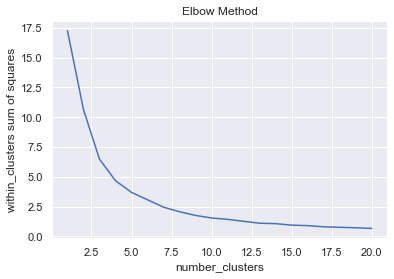

In [41]:
# Plot the Elbow to etimate miminal wscc that will be use as the optimal number os clusters.
number_clusters = range(1,21)
plt.plot(number_clusters,wscc)
plt.title('Elbow Method')
plt.xlabel('number_clusters')
plt.ylabel('within_clusters sum of squares')

# Based on the Elbow Curve, I am going to ( 5 , 8, 10), and see one that gives me more deseireable and interpretable plot.

In [42]:
# Assuming 5 as the desireable minimum wscc
kmeans_5 = KMeans(5)

In [43]:
kmeans_5.fit(X_scaled_study_aba)

KMeans(n_clusters=5)

In [44]:
# Clustering Result
identified_clusters_5 = kmeans_5.fit_predict(X_scaled_study_aba)
identified_clusters_5

array([0, 1, 4, 0, 1, 1, 1, 1, 3, 1, 3, 4, 2, 4, 0, 2, 1, 1, 4, 1, 4, 4,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 2, 2, 4, 4, 1, 3, 2, 4, 4,
       4, 4, 3, 0, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 1, 4,
       1, 1, 4, 1, 2, 3, 1, 1, 2, 4, 1, 1, 1, 4, 4, 0, 0, 4, 1, 0, 1, 0,
       2, 0, 2, 4, 0, 1, 0, 1, 2, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 4, 1, 2, 0, 0, 2, 1, 1, 2, 1, 4, 1, 0, 1, 2, 4, 1, 1, 1,
       2, 0, 1, 1, 1, 4, 4, 0, 2, 1, 4, 1, 2, 1, 1, 2, 4, 0, 0, 4, 4, 2,
       4, 2, 4, 2, 4, 0, 3, 1, 1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 2, 2, 1, 0,
       2, 1, 3, 1, 3, 1, 1, 1, 4, 0, 1, 4, 4, 0, 2, 3, 4, 2, 4, 0, 1, 4,
       4, 0, 1, 4, 0, 1, 1, 1, 4, 0, 4, 1, 0, 4, 4, 2, 1, 1, 2, 3, 0, 1,
       1, 2, 4, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 2, 2, 3, 3, 4, 4, 4, 4])

In [45]:
# Adding the cluster column to the data set and visualising it
data_with_clusters = country_data.copy()
data_with_clusters['Clustering_5'] = identified_clusters_5
data_with_clusters

,name,Longitude,Latitude,Clustering_5
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,4
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


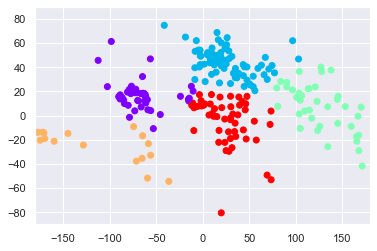

In [46]:
#Scatter Plot grouping names with 5 clusters
plt.scatter(country_data['Longitude'], country_data['Latitude'],c=data_with_clusters['Clustering_5'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()


In [47]:
# Assuming 8 as the desireable minimum wscc
kmeans_8 = KMeans(8)

In [48]:
kmeans_8.fit(X_scaled_study_aba)

KMeans()

In [49]:
# Clustering Result
identified_clusters_8 = kmeans_8.fit_predict(X_scaled_study_aba)
identified_clusters_8

array([3, 2, 1, 3, 0, 0, 0, 2, 7, 0, 5, 7, 4, 1, 3, 4, 0, 0, 6, 0, 6, 6,
       2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 7, 3, 3, 4, 2, 1, 6, 0, 7, 2, 6, 6,
       6, 6, 5, 3, 1, 6, 3, 3, 3, 3, 0, 0, 0, 0, 6, 3, 0, 3, 6, 3, 6, 6,
       0, 0, 6, 0, 4, 7, 0, 0, 4, 6, 0, 0, 0, 6, 6, 6, 6, 6, 0, 3, 0, 3,
       4, 3, 2, 1, 3, 0, 3, 0, 4, 0, 2, 4, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0,
       2, 2, 2, 6, 2, 2, 3, 3, 2, 0, 2, 2, 0, 6, 6, 3, 0, 2, 1, 0, 0, 0,
       2, 3, 0, 0, 0, 1, 2, 3, 4, 0, 6, 0, 2, 0, 2, 4, 1, 6, 3, 1, 1, 4,
       1, 4, 6, 4, 6, 3, 5, 0, 0, 2, 4, 4, 2, 2, 3, 5, 3, 4, 4, 4, 0, 3,
       2, 0, 7, 0, 5, 2, 0, 2, 6, 6, 2, 6, 6, 6, 4, 7, 1, 4, 6, 3, 0, 6,
       6, 0, 0, 6, 3, 0, 0, 0, 1, 3, 1, 0, 3, 6, 6, 2, 2, 2, 4, 5, 3, 0,
       0, 2, 1, 6, 0, 7, 3, 2, 0, 3, 3, 3, 3, 2, 4, 5, 5, 6, 1, 1, 1])

In [50]:
# Adding the cluster column to the data set and visualising it
data_with_clusters = country_data.copy()
data_with_clusters['Clustering_8'] = identified_clusters_8
data_with_clusters

,name,Longitude,Latitude,Clustering_8
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,6
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


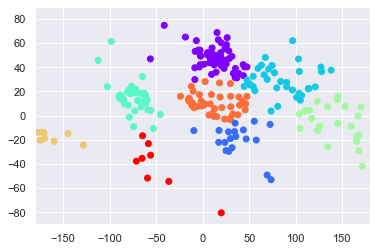

In [51]:
#Scatter Plot grouping names with 8 clusters
plt.scatter(country_data['Longitude'], country_data['Latitude'],c=data_with_clusters['Clustering_8'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [52]:
# Assuming 10 as the desireable minimum wscc
kmeans_10 = KMeans(10)

In [53]:
kmeans_10.fit(X_scaled_study_aba)

KMeans(n_clusters=10)

In [54]:
# Clustering Result
identified_clusters_10 = kmeans_10.fit_predict(X_scaled_study_aba)
identified_clusters_10

array([2, 1, 3, 2, 5, 5, 5, 1, 7, 1, 0, 8, 4, 8, 2, 4, 5, 1, 3, 5, 6, 6,
       9, 5, 1, 2, 2, 5, 2, 5, 2, 2, 7, 7, 2, 9, 9, 3, 6, 5, 7, 9, 6, 6,
       3, 6, 0, 2, 3, 6, 2, 2, 2, 2, 1, 1, 5, 5, 6, 2, 5, 2, 6, 2, 1, 6,
       5, 5, 6, 5, 4, 7, 5, 5, 4, 6, 5, 1, 5, 6, 6, 6, 6, 6, 5, 2, 5, 2,
       9, 2, 9, 8, 2, 5, 2, 5, 4, 5, 9, 4, 3, 5, 1, 1, 5, 1, 5, 2, 5, 1,
       9, 1, 1, 3, 1, 9, 2, 2, 9, 5, 1, 9, 1, 6, 6, 2, 5, 9, 3, 5, 5, 5,
       9, 2, 6, 5, 5, 3, 9, 2, 4, 5, 6, 5, 9, 5, 1, 9, 3, 6, 2, 3, 3, 9,
       3, 4, 6, 4, 6, 2, 0, 5, 5, 1, 4, 4, 1, 1, 2, 0, 7, 9, 9, 4, 5, 2,
       9, 5, 7, 1, 0, 1, 5, 1, 3, 6, 1, 6, 6, 6, 9, 7, 3, 4, 6, 2, 5, 6,
       6, 5, 5, 6, 2, 5, 5, 5, 3, 2, 3, 1, 2, 6, 6, 9, 1, 1, 4, 0, 2, 5,
       1, 9, 3, 6, 5, 7, 2, 1, 5, 2, 2, 2, 2, 9, 4, 0, 0, 6, 3, 3, 3])

In [55]:
# Adding the cluster column to the data set and visualising it
data_with_clusters = country_data.copy()
data_with_clusters['Clustering_10'] = identified_clusters_10
data_with_clusters

,name,Longitude,Latitude,Clustering_10
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,5
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,6
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


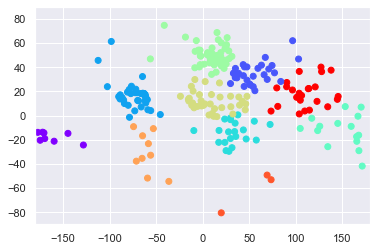

In [56]:
#Scatter Plot grouping names with 10 clusters
plt.scatter(country_data['Longitude'], country_data['Latitude'],c=data_with_clusters['Clustering_10'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [57]:
# from the comparism of the clusters plot. I strongly believe that the countries can best be grouped into 4 classes using their various longitude and latitude.

In [58]:
# for better visualization of the grouping done for these countries am going to use Heatmap( Dendogram)
# this plot uses the scaled values of longitude and latitude and the countries they grouped.

In [59]:
countries=country_data.iloc[:,0]
countries

0             Aruba
1       Afghanistan
2            Angola
3          Anguilla
4           Albania
           ...     
236           Samoa
237           Yemen
238    South Africa
239          Zambia
240        Zimbabwe
Name: name, Length: 241, dtype: object

In [60]:
X_scaled_study_aba

,Longitude,Latitude
0,0.307785,0.599343
1,0.697620,0.736661
2,0.558679,0.439477
3,0.327616,0.636085
4,0.565881,0.783738
...,...,...
236,0.014860,0.430072
237,0.644821,0.621173
238,0.580312,0.331842
239,0.588026,0.431972


In [61]:
Countries_grouped= pd.concat([countries, X_scaled_study_aba], axis=1)

In [62]:
Countries_grouped

,name,Longitude,Latitude
0,Aruba,0.307785,0.599343
1,Afghanistan,0.697620,0.736661
2,Angola,0.558679,0.439477
3,Anguilla,0.327616,0.636085
4,Albania,0.565881,0.783738
...,...,...,...
236,Samoa,0.014860,0.430072
237,Yemen,0.644821,0.621173
238,South Africa,0.580312,0.331842
239,Zambia,0.588026,0.431972


In [63]:
Country_Grouped = Countries_grouped.set_index('name')
Country_Grouped

,Longitude,Latitude
name,,
Aruba,0.307785,0.599343
Afghanistan,0.697620,0.736661
Angola,0.558679,0.439477
Anguilla,0.327616,0.636085
Albania,0.565881,0.783738
...,...,...
Samoa,0.014860,0.430072
Yemen,0.644821,0.621173
South Africa,0.580312,0.331842


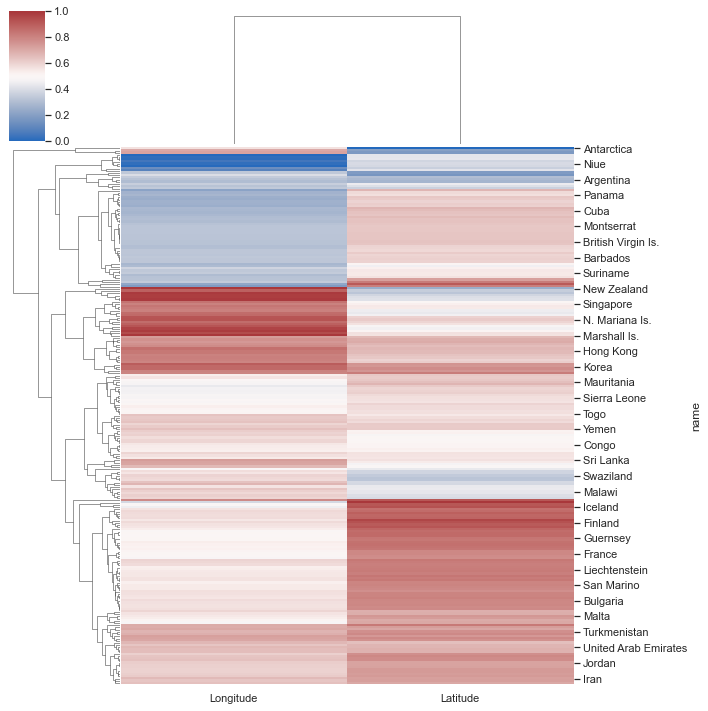

In [64]:
# Using seaborn to plot the Heatmap(Dendogram)
Henry = sns.clustermap(Country_Grouped,cmap = "vlag")

In [65]:
# Now am going to group these countries into various groups( A,B,C & D)
Summarized_clusters= pd.DataFrame(identified_clusters,columns=['names_groups'])

In [66]:
Summarized_clusters

,names_groups
0,3
1,2
2,0
3,3
4,2
...,...
236,3
237,0
238,0
239,0


In [67]:
Summarized_clusters_GROUPS= pd.concat([Countries_grouped, Summarized_clusters], axis=1)
Summarized_clusters_GROUPS

,name,Longitude,Latitude,names_groups
0,Aruba,0.307785,0.599343,3
1,Afghanistan,0.697620,0.736661,2
2,Angola,0.558679,0.439477,0
3,Anguilla,0.327616,0.636085,3
4,Albania,0.565881,0.783738,2
...,...,...,...,...
236,Samoa,0.014860,0.430072,3
237,Yemen,0.644821,0.621173,0
238,South Africa,0.580312,0.331842,0
239,Zambia,0.588026,0.431972,0


In [68]:
GROUP_A = Summarized_clusters_GROUPS[ (Summarized_clusters_GROUPS.names_groups == 0)]

In [69]:
GROUP_A

,name,Longitude,Latitude,names_groups
2,Angola,0.558679,0.439477,0
11,Antarctica,0.565512,0.000000,0
13,Fr. S. Antarctic Lands,0.706856,0.201390,0
18,Burundi,0.594047,0.497034,0
20,Benin,0.515078,0.580794,0
21,Burkina Faso,0.503375,0.597724,0
37,Botswana,0.576628,0.375756,0
38,Central African Rep.,0.567081,0.560993,0
42,CÃ´te d'Ivoire,0.492439,0.567823,0
43,Cameroon,0.544925,0.555342,0


In [70]:
GROUP_B = Summarized_clusters_GROUPS[ (Summarized_clusters_GROUPS.names_groups == 1)]

In [71]:
GROUP_B

,name,Longitude,Latitude,names_groups
12,Ashmore and Cartier Is.,0.862682,0.438597,1
15,Australia,0.893950,0.352893,1
22,Bangladesh,0.767090,0.672442,1
35,Brunei,0.837278,0.547795,1
36,Bhutan,0.767559,0.695273,1
41,China,0.806022,0.754226,1
70,Fiji,0.982705,0.406393,1
74,Micronesia,0.947696,0.566690,1
88,Guam,0.923410,0.605275,1
90,Hong Kong,0.835534,0.662978,1


In [72]:
GROUP_C = Summarized_clusters_GROUPS[ (Summarized_clusters_GROUPS.names_groups == 2)]

In [73]:
GROUP_C 

,name,Longitude,Latitude,names_groups
1,Afghanistan,0.697620,0.736661,2
4,Albania,0.565881,0.783738,2
5,Aland,0.565604,0.906612,2
6,Andorra,0.512878,0.792756,2
7,United Arab Emirates,0.664067,0.672687,2
...,...,...,...,...
219,Tunisia,0.535790,0.738493,2
220,Turkey,0.609223,0.770332,2
224,Ukraine,0.598371,0.834338,2
227,Uzbekistan,0.689408,0.787687,2


In [74]:
GROUP_D = Summarized_clusters_GROUPS[ (Summarized_clusters_GROUPS.names_groups == 3)]

In [75]:
GROUP_D

,name,Longitude,Latitude,names_groups
0,Aruba,0.307785,0.599343,3
3,Anguilla,0.327616,0.636085,3
8,Argentina,0.321553,0.290732,3
10,American Samoa,0.019007,0.426520,3
14,Antigua and Barb.,0.331258,0.629987,3
25,Canada,0.226586,0.914003,3
26,Bahamas,0.288734,0.675168,3
28,St-BarthÃ©lemy,0.328259,0.633990,3
30,Belize,0.254099,0.629490,3
31,Bermuda,0.322773,0.726858,3


In [76]:
# Further effort will be made to join the Groups by rows and plot the heatmap for better clearer visualization.
Combined_groups= pd.concat([GROUP_A,GROUP_B,GROUP_C,GROUP_D], axis=0)

In [77]:
Combined_groups

,name,Longitude,Latitude,names_groups
2,Angola,0.558679,0.439477,0
11,Antarctica,0.565512,0.000000,0
13,Fr. S. Antarctic Lands,0.706856,0.201390,0
18,Burundi,0.594047,0.497034,0
20,Benin,0.515078,0.580794,0
...,...,...,...,...
230,Venezuela,0.318681,0.564575,3
231,British Virgin Is.,0.323584,0.638030,3
232,U.S. Virgin Is.,0.322634,0.634352,3
235,Wallis and Futuna Is.,0.000000,0.429208,3


In [78]:
Henry_Combined_groups=Combined_groups.copy()

In [79]:
Henry_Combined_groups

,name,Longitude,Latitude,names_groups
2,Angola,0.558679,0.439477,0
11,Antarctica,0.565512,0.000000,0
13,Fr. S. Antarctic Lands,0.706856,0.201390,0
18,Burundi,0.594047,0.497034,0
20,Benin,0.515078,0.580794,0
...,...,...,...,...
230,Venezuela,0.318681,0.564575,3
231,British Virgin Is.,0.323584,0.638030,3
232,U.S. Virgin Is.,0.322634,0.634352,3
235,Wallis and Futuna Is.,0.000000,0.429208,3


In [80]:
Henry_Combined_groups=Henry_Combined_groups.drop(columns=['names_groups'], axis=1)

In [81]:
Henry_Combined_groups

,name,Longitude,Latitude
2,Angola,0.558679,0.439477
11,Antarctica,0.565512,0.000000
13,Fr. S. Antarctic Lands,0.706856,0.201390
18,Burundi,0.594047,0.497034
20,Benin,0.515078,0.580794
...,...,...,...
230,Venezuela,0.318681,0.564575
231,British Virgin Is.,0.323584,0.638030
232,U.S. Virgin Is.,0.322634,0.634352
235,Wallis and Futuna Is.,0.000000,0.429208


In [82]:
Henry_Combined_groups= Henry_Combined_groups.set_index('name')

In [83]:
Henry_Combined_groups

,Longitude,Latitude
name,,
Angola,0.558679,0.439477
Antarctica,0.565512,0.000000
Fr. S. Antarctic Lands,0.706856,0.201390
Burundi,0.594047,0.497034
Benin,0.515078,0.580794
...,...,...
Venezuela,0.318681,0.564575
British Virgin Is.,0.323584,0.638030
U.S. Virgin Is.,0.322634,0.634352


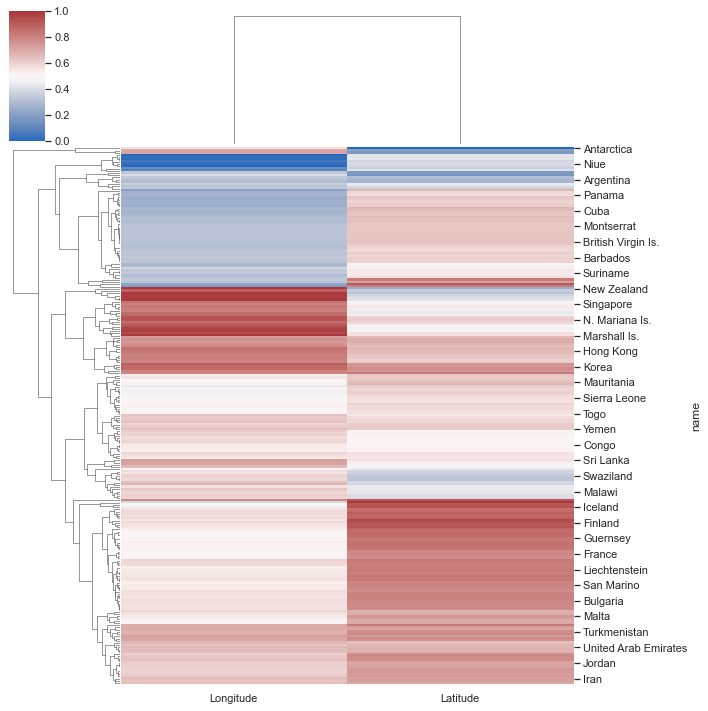

In [84]:
# Using seaborn to plot the Heatmap(Dendogram)
Henry_2 = sns.clustermap(Henry_Combined_groups,cmap = "vlag")

In [85]:
# It will be nice to save the model so it can be use for Deployment.
# if any of the (5,8,10) had worked better, I would have gone back to refit the model using (kmean_x fit)
import pickle
with open ('model','wb')as file:
    pickle.dump(kmeans_4,file)

In [86]:
# save the scaled model ie (the transformoperation).
with open ('scaler','wb')as file:
    pickle.dump(country_scaler,file)

In [87]:
# Saving the project using the module: .py file( file:download as python(.py)
# To deploy using the Custom-made module, all must be saved in the same folder including the new data sets.

# Thanks( Henry Nwachukwu: Machine Learning student  @ ERP College Calgary IT Center.)